In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

In [4]:
%%time
#importation des données
articles = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\articles.csv/articles.csv')
users = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\customers.csv/customers.csv')
df = pd.read_csv(r'C:\Users\Stagiaire\Downloads\Timsoft\H&M\transactions_train.csv/transactions.csv')

Wall time: 39.8 s


In [5]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


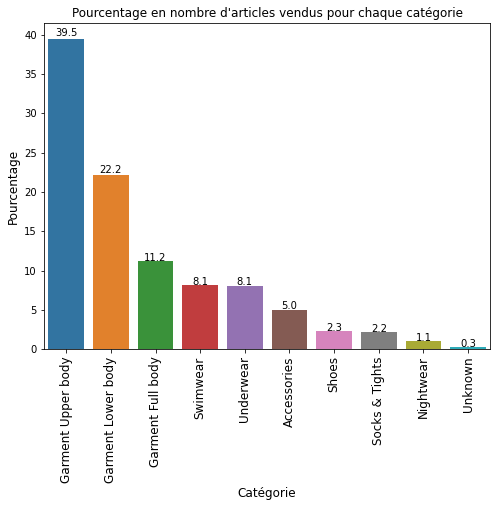

Wall time: 2min 15s


In [63]:
%%time
dfj = pd.merge(df,articles,on='article_id',how='left')
temp1 = dfj.groupby(["product_group_name"])["article_id"].count()
df1 = pd.DataFrame({'Index Name': temp1.index,
                   'Articles': temp1.values
                  })
df1 = df1.sort_values(['Articles'], ascending=False)
df1["pourcentage"]=(df1["Articles"] / df1["Articles"].sum())*100
df1 = df1.drop([1, 10, 2,17,4,8,14,9,3])
plt.figure(figsize = (8,6))
plt.title(f"Pourcentage en nombre d'articles vendus pour chaque catégorie" ,fontsize = 12)
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="pourcentage", data=df1)
show_values(s, space=0.05)
s.set_xticklabels(s.get_xticklabels(),rotation=90, fontsize = 12)
locs, labels = plt.xticks()
plt.xlabel("Catégorie", fontsize = 12)
plt.ylabel("Pourcentage", fontsize = 12)
plt.show()

In [65]:
df1

,Index Name,Articles,pourcentage
7,Garment Upper body,12552755,39.488571
6,Garment Lower body,7046054,22.165541
5,Garment Full body,3552470,11.175393
15,Swimwear,2579222,8.113740
16,Underwear,2565858,8.071700
0,Accessories,1599593,5.032014
12,Shoes,745521,2.345267
13,Socks & Tights,685712,2.157119
11,Nightwear,348180,1.095308
18,Unknown,97040,0.305269


In [5]:
k=df.head(100000)
k.to_csv('A verifier.csv')

In [6]:
temp1f = df.groupby(["t_dat"])["customer_id"].count()

In [7]:
temp1f.mean()

43308.34332425068

In [8]:
temp1f

t_dat
2018-09-20    48399
2018-09-21    47543
2018-09-22    17635
2018-09-23    52230
2018-09-24    45984
              ...  
2020-09-18    39284
2020-09-19    36796
2020-09-20    31489
2020-09-21    32130
2020-09-22    32866
Name: customer_id, Length: 734, dtype: int64

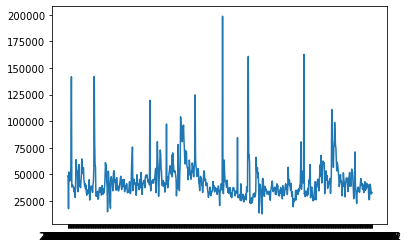

<Figure size 7200x720 with 0 Axes>

In [9]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(temp1f.index, temp1f.values)
plt.figure(figsize = (100,10))
plt.show() # affiche la figure à l'écran

In [10]:
np.unique(articles ["garment_group_name"].values)

array(['Accessories', 'Blouses', 'Dressed', 'Dresses Ladies',
       'Dresses/Skirts girls', 'Jersey Basic', 'Jersey Fancy', 'Knitwear',
       'Outdoor', 'Shirts', 'Shoes', 'Shorts', 'Skirts',
       'Socks and Tights', 'Special Offers', 'Swimwear', 'Trousers',
       'Trousers Denim', 'Under-, Nightwear', 'Unknown',
       'Woven/Jersey/Knitted mix Baby'], dtype=object)

In [11]:
np.unique(articles ["section_name"].values)

array(['Baby Boy', 'Baby Essentials & Complements', 'Baby Girl',
       'Boys Underwear & Basics', 'Collaborations', 'Contemporary Casual',
       'Contemporary Smart', 'Contemporary Street', 'Denim Men',
       'Divided Accessories', 'Divided Asia keys', 'Divided Basics',
       'Divided Collection', 'Divided Complements Other',
       'Divided Projects', 'Divided Selected', 'EQ Divided',
       'Girls Underwear & Basics', 'H&M+', 'Kids & Baby Shoes',
       'Kids Accessories, Swimwear & D', 'Kids Boy', 'Kids Girl',
       'Kids Local Relevance', 'Kids Outerwear', 'Kids Sports',
       'Ladies Denim', 'Ladies H&M Sport', 'Ladies Other', 'Mama',
       'Men Accessories', 'Men Edition', 'Men H&M Sport', 'Men Other',
       'Men Other 2', 'Men Project', 'Men Shoes', 'Men Suits & Tailoring',
       'Men Underwear', 'Mens Outerwear', 'Special Collections',
       'Womens Big accessories', 'Womens Casual',
       'Womens Everyday Basics', 'Womens Everyday Collection',
       'Womens Jackets

In [21]:
df

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


NameError: name 'cust' is not defined

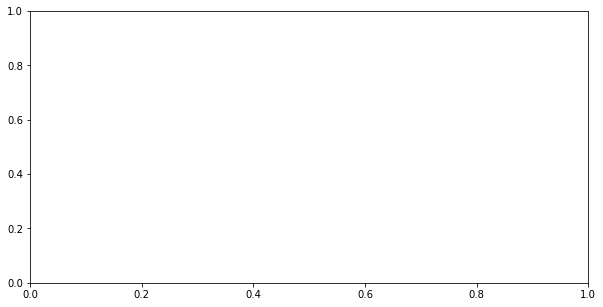

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=cust, x='age', bins=cust['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = cust['age'].median()
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show()

In [6]:
np.unique(articles ["perceived_colour_value_id"].values)

array([-1,  1,  2,  3,  4,  5,  6,  7], dtype=int64)

In [14]:
np.unique(articles ["department_name"].values)

array(['AK Bottoms', 'AK Dresses & Outdoor', 'AK Other',
       'AK Tops Jersey & Woven', 'AK Tops Knitwear', 'Accessories',
       'Accessories Boys', 'Accessories Other', 'Asia Assortment',
       'Baby Boy Jersey Fancy', 'Baby Boy Knitwear',
       'Baby Boy Local Relevance', 'Baby Boy Outdoor', 'Baby Boy Woven',
       'Baby Exclusive', 'Baby Girl Jersey Fancy', 'Baby Girl Knitwear',
       'Baby Girl Local Relevance', 'Baby Girl Outdoor',
       'Baby Girl Woven', 'Baby Nightwear', 'Baby Shoes', 'Baby Socks',
       'Baby Toys/Acc', 'Baby basics', 'Bags', 'Bags & Items', 'Basic 1',
       'Basics', 'Belts', 'Blanks', 'Blazer', 'Blazer S&T', 'Blouse',
       'Blouse & Dress', 'Boots', 'Bottoms', 'Bottoms Boys',
       'Bottoms Girls', 'Boys Local Relevance', 'Boys Small Acc & Bags',
       'Campaigns', 'Casual Lingerie', 'Clean Lingerie',
       'Conscious Exclusive', 'Denim Other Garments', 'Denim Trousers',
       'Denim shorts', 'Denim trousers',
       'Denim wardrobe H&M man i

In [15]:
np.unique(articles ["colour_group_name"].values)

array(['Beige', 'Black', 'Blue', 'Bronze/Copper', 'Dark Beige',
       'Dark Blue', 'Dark Green', 'Dark Grey', 'Dark Orange', 'Dark Pink',
       'Dark Purple', 'Dark Red', 'Dark Turquoise', 'Dark Yellow', 'Gold',
       'Green', 'Greenish Khaki', 'Grey', 'Greyish Beige', 'Light Beige',
       'Light Blue', 'Light Green', 'Light Grey', 'Light Orange',
       'Light Pink', 'Light Purple', 'Light Red', 'Light Turquoise',
       'Light Yellow', 'Off White', 'Orange', 'Other', 'Other Blue',
       'Other Green', 'Other Orange', 'Other Pink', 'Other Purple',
       'Other Red', 'Other Turquoise', 'Other Yellow', 'Pink', 'Purple',
       'Red', 'Silver', 'Transparent', 'Turquoise', 'Unknown', 'White',
       'Yellow', 'Yellowish Brown'], dtype=object)

In [16]:
np.unique(articles ["graphical_appearance_name"].values)

array(['All over pattern', 'Application/3D', 'Argyle', 'Chambray',
       'Check', 'Colour blocking', 'Contrast', 'Denim', 'Dot',
       'Embroidery', 'Front print', 'Glittering/Metallic', 'Hologram',
       'Jacquard', 'Lace', 'Melange', 'Mesh', 'Metallic',
       'Mixed solid/pattern', 'Neps', 'Other pattern', 'Other structure',
       'Placement print', 'Sequin', 'Slub', 'Solid', 'Stripe',
       'Transparent', 'Treatment', 'Unknown'], dtype=object)

In [17]:
np.unique(articles ["product_group_name"].values)

array(['Accessories', 'Bags', 'Cosmetic', 'Fun', 'Furniture',
       'Garment Full body', 'Garment Lower body', 'Garment Upper body',
       'Garment and Shoe care', 'Interior textile', 'Items', 'Nightwear',
       'Shoes', 'Socks & Tights', 'Stationery', 'Swimwear', 'Underwear',
       'Underwear/nightwear', 'Unknown'], dtype=object)

In [18]:
np.unique(articles ["product_type_name"].values)

array(['Accessories set', 'Alice band', 'Baby Bib', 'Backpack', 'Bag',
       'Ballerinas', 'Beanie', 'Belt', 'Bikini top', 'Blanket', 'Blazer',
       'Blouse', 'Bodysuit', 'Bootie', 'Boots', 'Bra', 'Bra extender',
       'Bracelet', 'Braces', 'Bucket hat', 'Bumbag', 'Cap', 'Cap/peaked',
       'Cardigan', 'Chem. cosmetics', 'Clothing mist', 'Coat', 'Costumes',
       'Cross-body bag', 'Cushion', 'Dog Wear', 'Dog wear', 'Dress',
       'Dungarees', 'Earring', 'Earrings', 'Eyeglasses', 'Felt hat',
       'Fine cosmetics', 'Flat shoe', 'Flat shoes', 'Flip flop',
       'Garment Set', 'Giftbox', 'Gloves', 'Hair clip', 'Hair string',
       'Hair ties', 'Hair/alice band', 'Hairband', 'Hat/beanie',
       'Hat/brim', 'Headband', 'Heeled sandals', 'Heels', 'Hoodie',
       'Jacket', 'Jumpsuit/Playsuit', 'Keychain', 'Kids Underwear top',
       'Leg warmers', 'Leggings/Tights', 'Long John', 'Marker pen',
       'Mobile case', 'Moccasins', 'Necklace', 'Night gown',
       'Nipple covers', 'Ot

In [19]:
np.unique(articles ["index_name"].values)

array(['Baby Sizes 50-98', 'Children Accessories, Swimwear',
       'Children Sizes 134-170', 'Children Sizes 92-140', 'Divided',
       'Ladies Accessories', 'Ladieswear', 'Lingeries/Tights', 'Menswear',
       'Sport'], dtype=object)

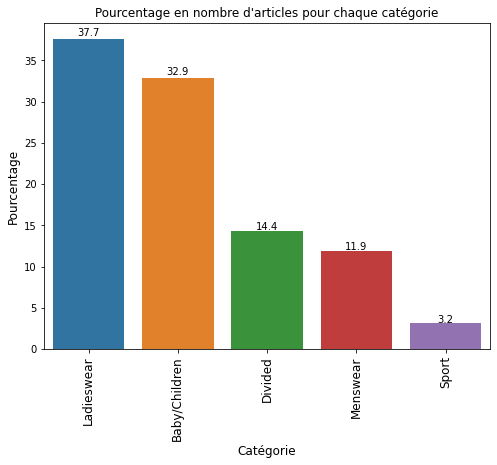

In [20]:
temp = articles.groupby(["index_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Index Name': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
df["pourcentage"]=(df["Articles"] / df["Articles"].sum())*100
plt.figure(figsize = (8,6))
plt.title(f"Pourcentage en nombre d'articles pour chaque catégorie" ,fontsize = 12)
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Index Name', y="pourcentage", data=df)
show_values(s, space=0.05)
s.set_xticklabels(s.get_xticklabels(),rotation=90, fontsize = 12)
locs, labels = plt.xticks()
plt.xlabel("Catégorie", fontsize = 12)
plt.ylabel("Pourcentage", fontsize = 12)
plt.show()

In [21]:
df

,Index Name,Articles,pourcentage
2,Ladieswear,39737,37.650414
0,Baby/Children,34711,32.888329
1,Divided,15149,14.353528
3,Menswear,12553,11.893843
4,Sport,3392,3.213886


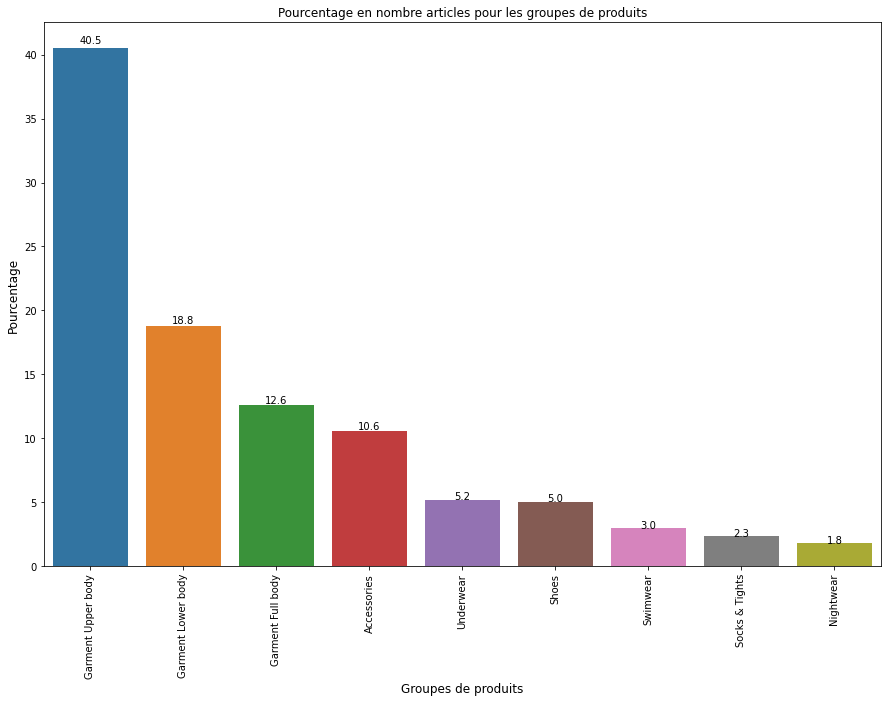

In [22]:
temp = articles.groupby(["product_group_name"])["article_id"].nunique()
df = pd.DataFrame({'Product Group': temp.index,
                   'Articles': temp.values
                  })
df = df.sort_values(['Articles'], ascending=False)
df["pourcentage"]=(df["Articles"] / df["Articles"].sum())*100
df = df.drop([18, 17, 2,1,10,4,8,14,9,3])
plt.figure(figsize = (15,10))
plt.title('Pourcentage en nombre articles pour les groupes de produits',fontsize = 12)
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Product Group', y="pourcentage", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
show_values(s, space=0.05)
locs, labels = plt.xticks()
plt.xlabel("Groupes de produits", fontsize = 12)
plt.ylabel("Pourcentage", fontsize = 12)
plt.show()

In [23]:
df

,Product Group,Articles,pourcentage
7,Garment Upper body,42741,40.496674
6,Garment Lower body,19812,18.771674
5,Garment Full body,13292,12.594038
0,Accessories,11158,10.572095
16,Underwear,5490,5.201721
12,Shoes,5283,5.005590
15,Swimwear,3127,2.962802
13,Socks & Tights,2442,2.313771
11,Nightwear,1899,1.799284


In [24]:
temp = articles.groupby(["index_group_name"])["product_type_name"].nunique()

In [25]:
pv= pd.pivot_table(articles, index= "index_group_name",values="article_id",aggfunc="count") 

pv = pv.sort_values(['article_id'], ascending=False)

In [26]:
pv

,article_id
index_group_name,
Ladieswear,39737
Baby/Children,34711
Divided,15149
Menswear,12553
Sport,3392


In [27]:
pv= pd.pivot_table(articles, index= "index_group_name",values="article_id",aggfunc="count",columns= "product_group_name",fill_value=0) 
pv

product_group_name,Accessories,Bags,Cosmetic,Fun,Furniture,Garment Full body,Garment Lower body,Garment Upper body,Garment and Shoe care,Interior textile,Items,Nightwear,Shoes,Socks & Tights,Stationery,Swimwear,Underwear,Underwear/nightwear,Unknown
index_group_name,,,,,,,,,,,,,,,,,,,
Baby/Children,2927,2,49,2,0,4823,7371,13178,0,3,0,1119,2239,1266,0,818,851,54,9
Divided,1463,15,0,0,0,2825,3182,6999,0,0,0,0,277,93,0,76,202,0,17
Ladieswear,5211,1,0,0,13,5601,5742,14110,9,0,16,663,2093,578,5,1912,3727,0,56
Menswear,1392,7,0,0,0,11,2464,6855,0,0,1,117,672,362,0,245,399,0,28
Sport,165,0,0,0,0,32,1053,1599,0,0,0,0,2,143,0,76,311,0,11


In [28]:
k=pv.iloc[2].sort_values( ascending=False)

In [29]:
k

product_group_name
Garment Upper body       14110
Garment Lower body        5742
Garment Full body         5601
Accessories               5211
Underwear                 3727
Shoes                     2093
Swimwear                  1912
Nightwear                  663
Socks & Tights             578
Unknown                     56
Items                       16
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Bags                         1
Fun                          0
Cosmetic                     0
Underwear/nightwear          0
Interior textile             0
Name: Ladieswear, dtype: int64

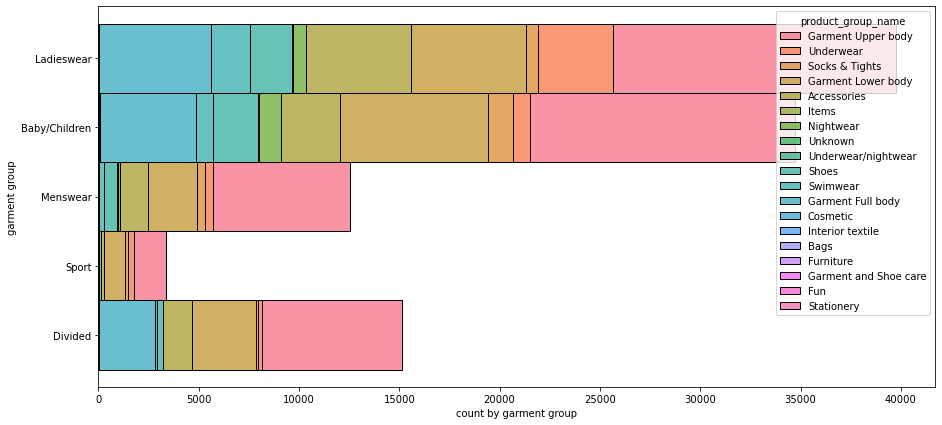

In [30]:
f, ax = plt.subplots(figsize=(15, 7))
ax = sns.histplot(data=articles, y='index_group_name', hue='product_group_name', multiple="stack")
ax.set_xlabel('count by garment group')
ax.set_ylabel('garment group')
plt.show()

<Figure size 1080x720 with 0 Axes>

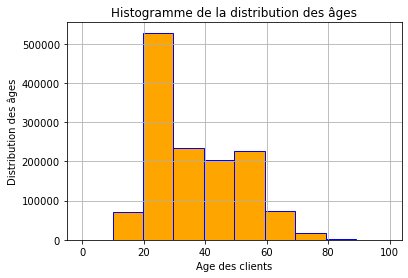

<Figure size 1080x720 with 0 Axes>

In [66]:
x = users.age.values
plt.hist(x, range = (0, 99), bins = 10, color = 'Orange',
            edgecolor = 'Blue')
plt.xlabel('Age des clients')
plt.ylabel('Distribution des âges')
plt.title('Histogramme de la distribution des âges')
plt.grid(True)
plt.figure(figsize = (15,10))


In [68]:
x = users.age.values
x

array([49., 25., 24., ..., 21., 18., 65.])

In [72]:
C=pd.DataFrame(x, columns =['ZZ'])
C.to_csv("Histogramme.csv")

In [32]:
cust_backup = users.copy()
users[['FN','Active']] = users[['FN','Active']].fillna(0)

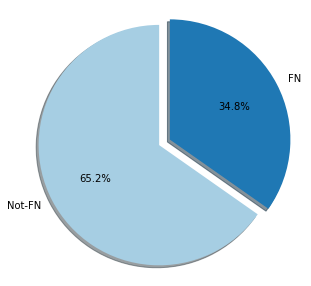

In [33]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(users['FN'].value_counts(), explode=explode, labels=['Not-FN','FN'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

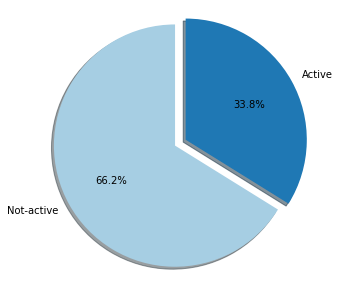

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(users['Active'].value_counts(), explode=explode, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show()

In [35]:
users

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


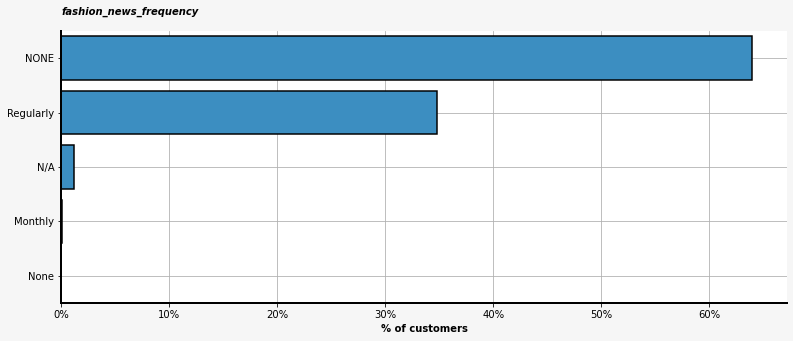

In [41]:
users['fashion_news_frequency'] = users['fashion_news_frequency'].fillna('N/A')
plot_bar(users, 'fashion_news_frequency', pct=True, label='customers')

In [57]:
import matplotlib.ticker as mtick

def plot_bar(database, col, figsize=(13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show()


In [58]:
max(df["price"])

KeyError: 'price'

In [60]:
%%time


KeyError: 'article_id'

NameError: name 'dfj' is not defined

In [46]:
%%time
df1["Articles"].sum()

NameError: name 'df1' is not defined

In [47]:
df1

NameError: name 'df1' is not defined

In [48]:
A = df.groupby(["t_dat"])["customer_id"].nunique()
B = df.groupby(["t_dat"])["customer_id"].count()
dff = pd.DataFrame({'date': A.index,
                   'Nombre de paniers': A.values,
                    'Nombre articles achetés' : B.values,
                  })

KeyError: 't_dat'

In [49]:
dff

NameError: name 'dff' is not defined

In [50]:
Panier_Moyen=(dff["Nombre articles achetés"].sum())/(dff["Nombre de paniers"].sum())
Panier_Moyen

NameError: name 'dff' is not defined

In [51]:
pvz= pd.pivot_table(df, index= "article_id",aggfunc="count") 
pvz = pvz.sort_values(['customer_id'], ascending=False)
pvz.head(10)

KeyError: 'article_id'

In [52]:
pvz["customer_id"].values.sum()

NameError: name 'pvz' is not defined

In [53]:
top12 = '0706016001 0706016002 0372860001 0610776002 0759871002 0464297007 0372860002 0610776001 0399223001 0706016003 0720125001 0156231001'